# Wine Quality

## Notebook by [WenyiXu](https://github.com/xuwenyihust)

### Import libraries

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.cross_validation

### Load the data

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/xuwenyihust/Wine-Quality/master/data/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
print(wine.shape)

(1599, 12)


Separate the dataset into **feature matrix X** & **respoinse vector y**.

In [28]:
X_df = df.iloc[:,:-1]
X_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [30]:
X = X_df.as_matrix()
print(X[:3])

[[  7.40000000e+00   7.00000000e-01   0.00000000e+00   1.90000000e+00
    7.60000000e-02   1.10000000e+01   3.40000000e+01   9.97800000e-01
    3.51000000e+00   5.60000000e-01   9.40000000e+00]
 [  7.80000000e+00   8.80000000e-01   0.00000000e+00   2.60000000e+00
    9.80000000e-02   2.50000000e+01   6.70000000e+01   9.96800000e-01
    3.20000000e+00   6.80000000e-01   9.80000000e+00]
 [  7.80000000e+00   7.60000000e-01   4.00000000e-02   2.30000000e+00
    9.20000000e-02   1.50000000e+01   5.40000000e+01   9.97000000e-01
    3.26000000e+00   6.50000000e-01   9.80000000e+00]]


In [73]:
y_df = df["quality"].values
print(y_df[:10])

[5 5 5 6 5 5 5 7 7 5]


### Data Preview

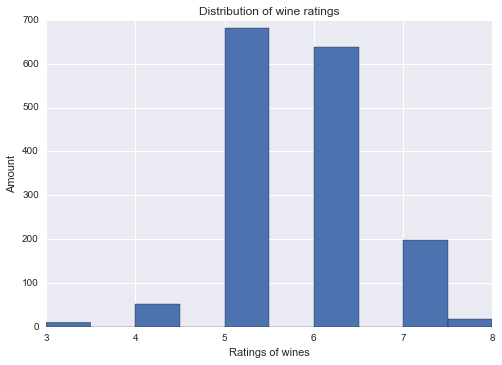

In [75]:
plt.hist(y_df)

plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

### 1~10 Ratings to Binary Classification

Simplify the classification problem into a binary one: **good/bad**

Score < 7: bad(0); score >= 7: good(1).

In [74]:
# sklearn can only deal with numpy arrys
y = np.array([1 if i>=7 else 0 for i in y_df])
print(y[:10])

[0 0 0 0 0 0 0 1 1 0]


### Random Forests Classifier Construction

Choose random forests method to do the classification.

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

### Parameter Tuning

Parameter '**number of decision trees to construct**' is very important.

Iterate the 'number of decision trees'(**n_estimators**) parameter from 1 to 40.

For each iteration, use **cross_val_score** to compute its score 10 times with different splitting.

In [64]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, y, cv=10))

In [66]:
print(scores[0])
print(scores[1])

[ 0.83850932  0.85093168  0.76875     0.7875      0.84375     0.84375     0.8
  0.80503145  0.81132075  0.87421384]
[ 0.88198758  0.86956522  0.85        0.8375      0.88125     0.8375
  0.8375      0.8427673   0.8490566   0.88679245]


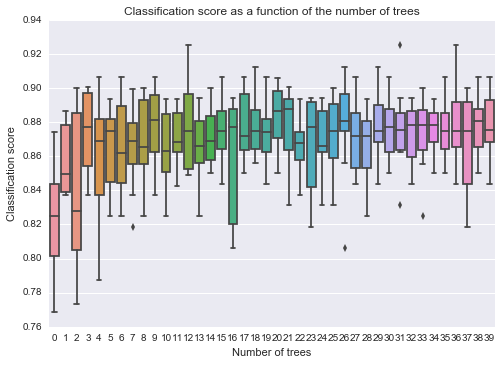

In [71]:
sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

### Unbalanced Classification Evaluation